In [2]:
import numpy as np 
import pandas as pd 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
file_to_import = "/home/flopper/Desktop/Coding/Diabetes Prediction App/diabetes_dataset.csv"
data = pd.read_csv(file_to_import)

print(data.head()) 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
class_distribution = data['Outcome'].value_counts()
print(class_distribution)


Outcome
0    500
1    268
Name: count, dtype: int64


In [7]:
X = data.drop(columns=['Outcome'])
y = data['Outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [8]:
print(f' Train features shape: {X_train.shape}\n',f'Test features shape: {X_test.shape}\n',f'Train label shape: {y_train.shape}\n', f'Test label shape: {y_test.shape}')

 Train features shape: (576, 8)
 Test features shape: (192, 8)
 Train label shape: (576,)
 Test label shape: (192,)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
svm = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True, random_state=42)
gb = GradientBoostingClassifier(n_estimators=64, learning_rate=0.1, max_depth=3, min_samples_split=2, random_state=42)
rf = RandomForestClassifier(n_estimators=64, max_depth=10, min_samples_split=3, random_state=42)

#Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('svm', svm),
        ('gb', gb),
        ('rf', rf)
    ],
    voting='soft'
)


In [ ]:

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on the training set
cv_scores = cross_val_score(voting_classifier, X_train_scaled, y_train, cv=kf)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the voting classifier on the training data
voting_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = voting_classifier.predict(X_test_scaled)

# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy score:")
print(accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# *Logistic Regresssion*

In [9]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [10]:
y_resampled_series = pd.Series(y_resampled)

class_counts = y_resampled_series.value_counts()
print(class_counts)

Outcome
0    366
1    366
Name: count, dtype: int64


In [76]:
#didn't use it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

In [12]:
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
grid = GridSearchCV(LogisticRegression(random_state=4), param_grid, cv=5)
grid.fit(X_resampled, y_resampled)

print("Best parameters:", grid.best_params_)

/home/flopper/coding/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/flopper/coding/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/flopper/coding/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/flopper/coding/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/flopper/coding/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/flopper/coding/lib/python3.12/site-packages/sklearn/linear_model/_sag

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


/home/flopper/coding/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/flopper/coding/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [13]:
log_reg = LogisticRegression(C=1, penalty='l2', max_iter=1000, random_state=2, solver='liblinear')
log_reg.fit(X_resampled, y_resampled)

LogisticRegression(C=1, max_iter=1000, random_state=2, solver='liblinear')

In [14]:
y_pred = log_reg.predict(X_test)

#Eval
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy score:")
print(accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[108  26]
 [ 20  38]]

Accuracy score:
0.7604166666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       134
           1       0.59      0.66      0.62        58

    accuracy                           0.76       192
   macro avg       0.72      0.73      0.72       192
weighted avg       0.77      0.76      0.76       192



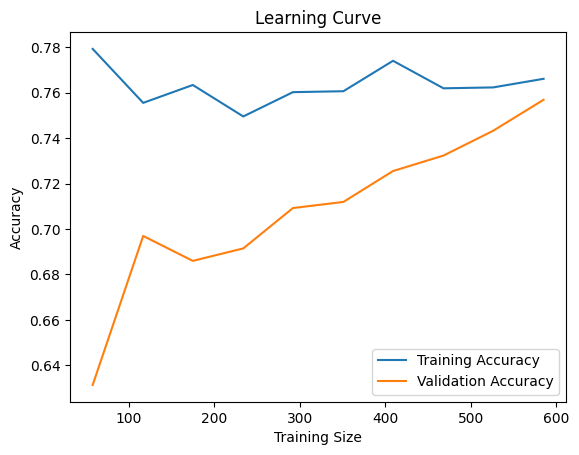

In [15]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X_resampled, y_resampled, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [16]:
from joblib import dump

dump(log_reg, 'diabetes_model.joblib')

['diabetes_model.joblib']